Steg 1:
Det vi har börjat med är att vi har importerat CSV-filen i VS Code och sedan läst in filen med pandas.read_csv och eftersom filen är semikolon sepererad så har vi använt sep=";" Vi kan se att det finns 10 000 rader i varje kolumn, 10 kolumner och inga nollvärden etc. (Vi får finslipa texterna, detta är bara liten start)

In [16]:
import pandas as pd
from sklearn.model_selection import train_test_split

df = pd.read_csv("car_price_dataset.csv", sep=";")
print(df.head()) #visar de första raderna i datan
print()
print(df.shape)  #kollar storlek på rader och kolumner
print()
print(df.info()) # kontrollerar kolumner och datatyper
print()

        Brand   Model  Year  Engine_Size Fuel_Type    Transmission  Mileage  \
0         Kia     Rio  2020          4.2    Diesel          Manual   289944   
1   Chevrolet  Malibu  2012          2.0    Hybrid       Automatic     5356   
2    Mercedes     GLA  2020          4.2    Diesel       Automatic   231440   
3        Audi      Q5  2023          2.0  Electric          Manual   160971   
4  Volkswagen    Golf  2003          2.6    Hybrid  Semi-Automatic   286618   

   Doors  Owner_Count  Price  
0      3            5   8501  
1      2            3  12092  
2      4            2  11171  
3      2            1  11780  
4      3            3   2867  

(10000, 10)

<class 'pandas.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Brand         10000 non-null  str    
 1   Model         10000 non-null  str    
 2   Year          10000 non-null  int64  
 3   Engine_S

In [17]:
# Delar upp i X och y
X = df.drop("Price", axis=1)
y = df["Price"]

# Delar upp i (hel)tränings- och 20% testset
X_train_full, X_test, y_train_full, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

# Delar upp träningsset i 20 % tränings- och 20% valideringsset
X_train, X_val, y_train, y_val = train_test_split(
    X_train_full, y_train_full, test_size=0.25, random_state=42)


# Skapa en EDA-dataframe 
EDA_train_df = X_train_full.copy()
EDA_train_df["Price"] = y_train_full

print(EDA_train_df.head()) #visar de första raderna i datan
print(EDA_train_df.shape)  #kollar storlek på rader och kolumner
print(EDA_train_df.info()) # kontrollerar kolumner och datatyper

           Brand     Model  Year  Engine_Size Fuel_Type    Transmission  \
9254  Volkswagen      Golf  2007          3.2    Hybrid  Semi-Automatic   
1561         BMW  5 Series  2010          4.8  Electric  Semi-Automatic   
1670     Hyundai    Sonata  2006          1.9    Hybrid  Semi-Automatic   
6087       Honda      CR-V  2019          1.7    Diesel  Semi-Automatic   
6669    Mercedes   E-Class  2005          3.6    Petrol       Automatic   

      Mileage  Doors  Owner_Count  Price  
9254    33948      5            4   9721  
1561   224853      2            1   9402  
1670    13435      3            5   8531  
6087   199846      2            3   7503  
6669      261      3            2  10694  
(8000, 10)
<class 'pandas.DataFrame'>
Index: 8000 entries, 9254 to 7270
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Brand         8000 non-null   str    
 1   Model         8000 non-null   str    
 2   Year     

Steg 2. Grundläggande statistik (numeriska kolumner) 

Vi analyserade grundläggande statistik för numeriska variabler. Det gav en första förståelse för spridning, typiska värden och eventuella extrema observationer.


In [18]:
EDA_train_df.describe()

,Year,Engine_Size,Mileage,Doors,Owner_Count,Price
count,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000
mean,2011.520375,2.996887,149477.003250,3.503625,2.991875,8828.745250
std,6.897792,1.153237,86613.284937,1.111482,1.420849,3132.164285
min,2000.000000,1.000000,25.000000,2.000000,1.000000,2000.000000
25%,2006.000000,2.000000,74192.250000,3.000000,2.000000,6604.750000
50%,2012.000000,3.000000,150069.500000,4.000000,3.000000,8829.000000
75%,2017.000000,4.000000,224292.750000,4.000000,4.000000,11071.000000
max,2023.000000,5.000000,299947.000000,5.000000,5.000000,18301.000000


Kategoriska variabler (räkna värden)

Vi analyserade fördelningen av kategoriska variabler för att förstå databalansen mellan olika klasser.

In [21]:
categorical_cols = ['Brand', 'Model', 'Fuel_Type', 'Transmission']

for col in categorical_cols:
    print(f"\n--- {col} ---")
    print(EDA_train_df[col].value_counts())


--- Brand ---
Brand
Audi          851
Volkswagen    828
Ford          826
Hyundai       818
Honda         807
Chevrolet     799
BMW           788
Toyota        775
Kia           772
Mercedes      736
Name: count, dtype: int64

--- Model ---
Model
Accord      302
Fiesta      300
Tiguan      293
A4          288
Q5          286
Impala      284
Elantra     282
A3          277
Optima      277
Sonata      274
5 Series    273
3 Series    273
Passat      272
Malibu      268
Corolla     265
Golf        263
Focus       263
Explorer    263
Tucson      262
Civic       258
Rio         257
Camry       256
RAV4        254
GLA         253
E-Class     249
CR-V        247
Equinox     247
X5          242
Sportage    238
C-Class     234
Name: count, dtype: int64

--- Fuel_Type ---
Fuel_Type
Electric    2074
Diesel      2016
Petrol      1959
Hybrid      1951
Name: count, dtype: int64

--- Transmission ---
Transmission
Manual            2707
Semi-Automatic    2647
Automatic         2646
Name: count, dtype:

In [22]:
EDA_train_df['Fuel_Type'].value_counts()


Fuel_Type
Electric    2074
Diesel      2016
Petrol      1959
Hybrid      1951
Name: count, dtype: int64

In [23]:
# Vi kontrollerade förekomsten av saknade värden och kunde konstatera att datasetet inte innehåller några tomma värden.

EDA_train_df.isna().sum()

Brand           0
Model           0
Year            0
Engine_Size     0
Fuel_Type       0
Transmission    0
Mileage         0
Doors           0
Owner_Count     0
Price           0
dtype: int64

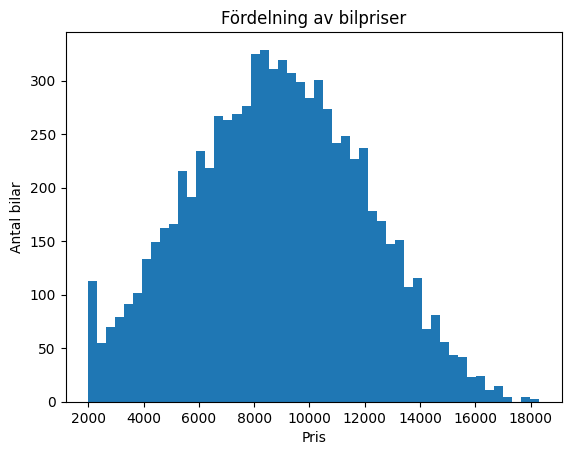

In [24]:
# Visualisera data

import matplotlib.pyplot as plt

plt.hist(EDA_train_df['Price'], bins=50)
plt.title("Fördelning av bilpriser")
plt.xlabel("Pris")
plt.ylabel("Antal bilar")
plt.show()


Histogrammet visar fördelningen av bilpriser i datasetet. Fördelningen är unimodal med en tydlig topp runt 8 000–10 000, vilket indikerar att majoriteten av bilarna ligger i detta prisspann. Fördelningen är svagt högerskev, med ett mindre antal bilar som har betydligt högre priser. Detta tyder på förekomst av dyrare bilar som kan betraktas som potentiella outliers. Resultatet ger en god förståelse för målvariabelns spridning och är viktig inför fortsatt modellering.

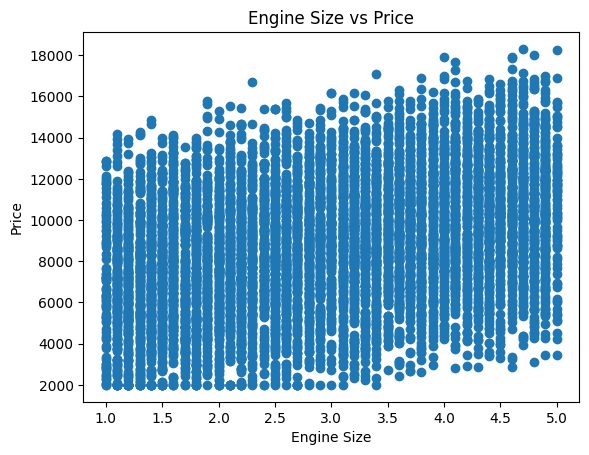

In [25]:
# Samband mellan variabler och Price
# Engine size vs Price

plt.scatter(EDA_train_df['Engine_Size'], EDA_train_df['Price'])
plt.xlabel("Engine Size")
plt.ylabel("Price")
plt.title("Engine Size vs Price")
plt.show()


Diagrammet visar sambandet mellan motorstorlek (Engine Size) och bilpris. Det finns ett tydligt positivt samband, där större motorstorlek generellt är associerad med högre priser. Samtidigt observeras en relativt stor spridning i priset för varje motorstorlek, vilket indikerar att även andra faktorer påverkar bilpriset. Trots spridningen framstår Engine Size som en viktig prediktor för pris i den fortsatta modelleringen.

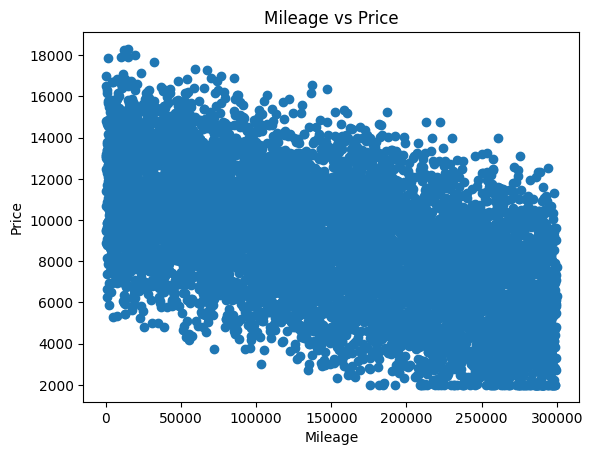

In [26]:
# Mileage vs Price

plt.scatter(EDA_train_df['Mileage'], EDA_train_df['Price'])
plt.xlabel("Mileage")
plt.ylabel("Price")
plt.title("Mileage vs Price")
plt.show()

Diagrammet visar sambandet mellan körsträcka (Mileage) och bilpris. Det finns ett tydligt negativt samband där högre körsträcka generellt är förknippad med lägre pris. Bilar med låg körsträcka uppvisar högre och mer varierande priser, medan priserna tenderar att minska och samlas på lägre nivåer vid högre körsträckor. Detta indikerar att Mileage är en viktig faktor för att förklara variationen i bilpriser och bör inkluderas i den fortsatta modelleringen.

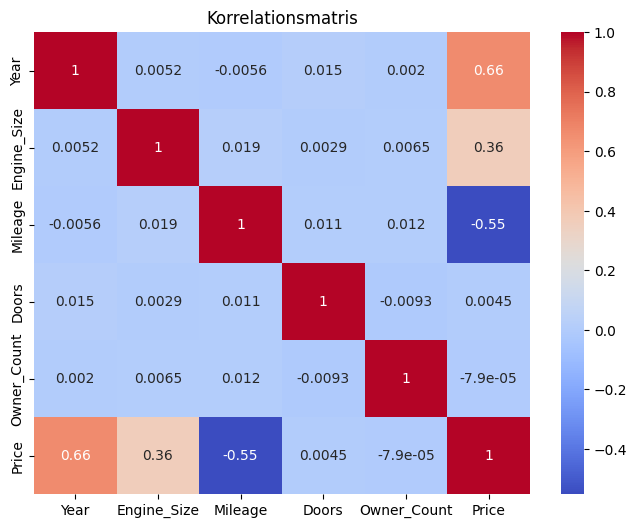

In [27]:
# Korrelationsmatris

import seaborn as sns

plt.figure(figsize=(8,6))
sns.heatmap(EDA_train_df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Korrelationsmatris")
plt.show()

Korrelationsmatrisen visar sambanden mellan de numeriska variablerna i datasetet. Resultaten indikerar att bilpriset har en stark positiv korrelation med tillverkningsår (Year), vilket innebär att nyare bilar generellt har högre priser. Det finns även en måttlig positiv korrelation mellan motorstorlek (Engine Size) och pris. Samtidigt observeras en tydlig negativ korrelation mellan körsträcka (Mileage) och pris, vilket tyder på att bilar med högre körsträcka tenderar att ha lägre värde. Övriga variabler uppvisar svaga eller obetydliga samband med priset.

Kort sammanfattning: Baserat på den explorativa dataanalysen valdes Year, Mileage och Engine Size som numeriska variabler, då dessa uppvisade tydliga samband med priset. De kategoriska variablerna Fuel_Type och Transmission inkluderades eftersom de har ett begränsat antal kategorier och förväntas påverka bilpriset. Variablerna Model och Owner_Count exkluderades på grund av hög dimensionalitet respektive låg korrelation med målvariabeln.

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

numeric_features = ["Year", "Mileage", "Engine_Size"]
categorical_features = ["Fuel_Type", "Transmission"]

preprocess = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numeric_features),
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_features)
    ]
)

